In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [8]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [10]:
df=df.drop(['Unnamed: 0'], axis=1)

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [15]:
import matplotlib.pyplot as plt

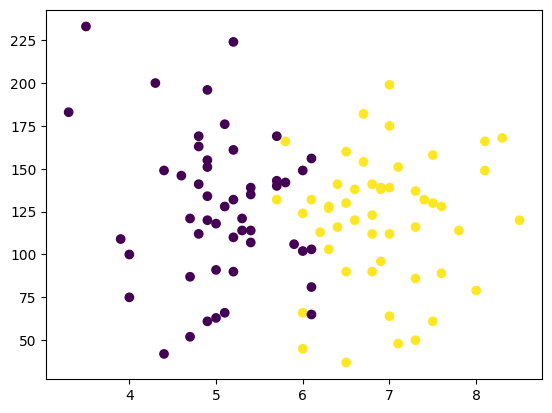

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [18]:
X=df.drop('placement', axis=1)
y=df.placement

In [19]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

In [25]:
X_train

array([[-0.14392856,  0.49602531],
       [-0.9316457 ,  0.8209691 ],
       [-0.49402507,  0.32105558],
       [ 0.64378857,  0.79597342],
       [ 1.25645746,  0.24606855],
       [-1.01916983,  1.17090857],
       [ 0.3812162 ,  0.47102963],
       [-0.5815492 , -0.02888389],
       [ 0.90636095,  1.32088263],
       [-1.10669395, -1.75358556],
       [ 0.7313127 , -0.80374986],
       [ 0.46874032, -2.1285207 ],
       [-0.66907332, -0.30383633],
       [-0.9316457 ,  1.84579183],
       [ 1.86912635,  0.67099504],
       [-0.66907332,  2.54567076],
       [-0.05640444, -0.40381904],
       [ 0.29369207, -0.47880607],
       [-0.49402507, -0.20385363],
       [ 0.7313127 , -0.25384498],
       [ 0.81883683, -0.6537758 ],
       [ 0.29369207,  0.12109017],
       [ 0.03111969, -0.50380174],
       [ 0.81883683,  0.3960426 ],
       [-1.10669395, -0.02888389],
       [ 1.16893333,  0.37104693],
       [-1.36926633, -2.00354232],
       [-1.01916983,  1.02093451],
       [-1.01916983,

In [26]:
X_test

array([[ 1.34398159,  0.89595613],
       [ 1.78160222, -1.0787023 ],
       [-0.49402507,  0.42103828],
       [-1.45679046,  1.94577453],
       [-0.23145269,  0.52102099],
       [ 0.3812162 , -0.15386227],
       [ 0.64378857,  1.49585236],
       [ 0.11864382, -0.47880607],
       [ 0.90636095, -0.25384498],
       [-0.66907332,  0.24606855]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()

In [29]:
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred=lr.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
score=accuracy_score(y_pred,y_test)

In [33]:
score

0.9

In [35]:
from mlxtend.plotting import plot_decision_regions

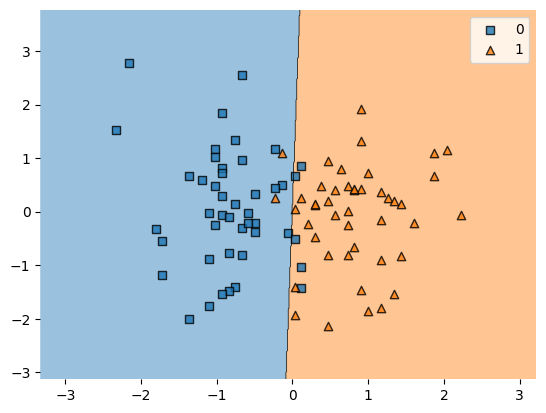

In [40]:
plot_decision_regions(X_train, y_train.values, clf=lr, legend=2)
plt.legend()

In [38]:
import pickle

In [39]:
pickle.dump(lr,open('model.pkl','wb'))